In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/sample_submission.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/subjects.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tasks.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/defog_metadata.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/daily_metadata.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/events.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tdcsfog_metadata.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/48b636e0f5.parquet
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/9fb7805d99.parquet
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/e658b0aa3d.parquet
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/1c3719ea59.parquet
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/164adaed7b.parquet
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/24

In [2]:
cd ../input 

/kaggle/input


In [3]:
cd tlvmc-parkinsons-freezing-gait-prediction

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction


In [4]:
cd train/defog

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog


In [5]:
ls

02ea782681.csv  32d03020a9.csv  68e7e02a47.csv  9f2b3555c8.csv  daa4d27db4.csv
06414383cf.csv  38befe9f39.csv  6a20935af5.csv  a057215d88.csv  dd0ddc0bb5.csv
092b4c1819.csv  3e6987cb2d.csv  6c300fcdd5.csv  a2f1a8ab76.csv  e069a57511.csv
0c55be4384.csv  3f3b08f78d.csv  6dc94db321.csv  a8c5a489bd.csv  e1f92471b9.csv
0d7ab3a9f9.csv  3f970065e5.csv  7030643376.csv  aafcbecb5a.csv  e642d9ea5f.csv
0eaac04f17.csv  41bc215f97.csv  771d69d829.csv  afaec39b8c.csv  e971ae2a09.csv
0ec76d2d8e.csv  4520cf1068.csv  77d7d95074.csv  afc4b9d2a8.csv  edd79a7494.csv
139f60d29b.csv  4c0aec9035.csv  7a467da4f3.csv  b3891f42d0.csv  f0b8335d50.csv
13a4fe5159.csv  4c3aa8ea6e.csv  7a993fbed7.csv  b4365bba9d.csv  f17eacf7d8.csv
15508c7f41.csv  4ec23c3d98.csv  7b5346a3f2.csv  bdcff4be3a.csv  f2ffe15369.csv
18e7abc37e.csv  4f613ccf88.csv  8282009100.csv  bdda73c9be.csv  f3a921edee.csv
1d99c2eecf.csv  509a9830a6.csv  850748a138.csv  be15a0d6c5.csv  f40e8c6ebe.csv
1ff78d55e9.csv  519f292daa.csv  88c6d288fb.csv  be9d

In [6]:
import pandas as pd
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [7]:
csv_files = glob.glob('*.csv') # traverse the defog folder
dfmain = []
for file in csv_files:
    df = pd.read_csv(file)  # read the individual csv
    dfmain.append(df)        # append the df dataframe
dfmaster = pd.concat(dfmain,axis=0,ignore_index=True)
print(dfmaster) #print the merged dataframe

            Time      AccV     AccML     AccAP  StartHesitation  Turn  \
0              0 -1.002697  0.022371  0.068304                0     0   
1              1 -1.002641  0.019173  0.066162                0     0   
2              2 -0.999820  0.019142  0.067536                0     0   
3              3 -0.998023  0.018378  0.068409                0     0   
4              4 -0.998359  0.016726  0.066448                0     0   
...          ...       ...       ...       ...              ...   ...   
13525697  109120 -0.939241  0.031564 -0.394737                0     0   
13525698  109121 -0.941096  0.031582 -0.392626                0     0   
13525699  109122 -0.940131  0.029092 -0.394385                0     0   
13525700  109123 -0.939872  0.028058 -0.398664                0     0   
13525701  109124 -0.939006  0.026628 -0.398454                0     0   

          Walking  Valid   Task  
0               0  False  False  
1               0  False  False  
2               0  Fa

In [8]:
print(dfmaster)

            Time      AccV     AccML     AccAP  StartHesitation  Turn  \
0              0 -1.002697  0.022371  0.068304                0     0   
1              1 -1.002641  0.019173  0.066162                0     0   
2              2 -0.999820  0.019142  0.067536                0     0   
3              3 -0.998023  0.018378  0.068409                0     0   
4              4 -0.998359  0.016726  0.066448                0     0   
...          ...       ...       ...       ...              ...   ...   
13525697  109120 -0.939241  0.031564 -0.394737                0     0   
13525698  109121 -0.941096  0.031582 -0.392626                0     0   
13525699  109122 -0.940131  0.029092 -0.394385                0     0   
13525700  109123 -0.939872  0.028058 -0.398664                0     0   
13525701  109124 -0.939006  0.026628 -0.398454                0     0   

          Walking  Valid   Task  
0               0  False  False  
1               0  False  False  
2               0  Fa

In [9]:
# taking only that rows which are labeled true
dfmaster = dfmaster[(dfmaster['Task']==1) & (dfmaster['Valid']==1)]  
dfmaster

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
1000,1000,-1.015138,-0.071969,0.161124,0,0,0,True,True
1001,1001,-1.018566,-0.057850,0.144988,0,0,0,True,True
1002,1002,-1.037102,-0.054200,0.129327,0,0,0,True,True
1003,1003,-1.036416,-0.060578,0.115451,0,0,0,True,True
1004,1004,-1.012407,-0.069198,0.110121,0,0,0,True,True
...,...,...,...,...,...,...,...,...,...
13524697,108120,-0.978999,0.043111,-0.392852,0,0,0,True,True
13524698,108121,-0.949352,0.016142,-0.362455,0,0,0,True,True
13524699,108122,-0.909800,-0.007553,-0.364498,0,0,0,True,True
13524700,108123,-0.882329,-0.022470,-0.374119,0,0,0,True,True


In [10]:
dfmaster_new = dfmaster.drop(columns=['Valid','Task']) # dropping the valid and task attribute

In [11]:
dfmaster_new

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
1000,1000,-1.015138,-0.071969,0.161124,0,0,0
1001,1001,-1.018566,-0.057850,0.144988,0,0,0
1002,1002,-1.037102,-0.054200,0.129327,0,0,0
1003,1003,-1.036416,-0.060578,0.115451,0,0,0
1004,1004,-1.012407,-0.069198,0.110121,0,0,0
...,...,...,...,...,...,...,...
13524697,108120,-0.978999,0.043111,-0.392852,0,0,0
13524698,108121,-0.949352,0.016142,-0.362455,0,0,0
13524699,108122,-0.909800,-0.007553,-0.364498,0,0,0
13524700,108123,-0.882329,-0.022470,-0.374119,0,0,0


In [12]:
dfmaster_new = dfmaster_new.drop(columns=['Time']) 

In [13]:
dfmaster_new

,AccV,AccML,AccAP,StartHesitation,Turn,Walking
1000,-1.015138,-0.071969,0.161124,0,0,0
1001,-1.018566,-0.057850,0.144988,0,0,0
1002,-1.037102,-0.054200,0.129327,0,0,0
1003,-1.036416,-0.060578,0.115451,0,0,0
1004,-1.012407,-0.069198,0.110121,0,0,0
...,...,...,...,...,...,...
13524697,-0.978999,0.043111,-0.392852,0,0,0
13524698,-0.949352,0.016142,-0.362455,0,0,0
13524699,-0.909800,-0.007553,-0.364498,0,0,0
13524700,-0.882329,-0.022470,-0.374119,0,0,0


In [14]:
cd -

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction


In [15]:
ls

daily_metadata.csv  sample_submission.csv  tdcsfog_metadata.csv  unlabeled/
defog_metadata.csv  subjects.csv           test/
events.csv          tasks.csv              train/


In [16]:
cd train/tdcsfog

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog


In [17]:
ls

003f117e14.csv  311e2722d2.csv  6e22817d93.csv  9b9e2d20c5.csv  ca9d202068.csv
009ee11563.csv  31c7065b3d.csv  6e258d0083.csv  9c9baf9458.csv  cbc907dd0e.csv
011322847a.csv  323e69055f.csv  6e6ad18f5e.csv  9cb654d456.csv  cc90f69789.csv
01d0fe7266.csv  32685c1cb7.csv  6f4013fb72.csv  9d02d58fa7.csv  cc91b27f46.csv
024418ba39.csv  3291d59f24.csv  6fb2cba36f.csv  9d161e0027.csv  ccf39d0b9e.csv
024ba3ebd5.csv  32b4bdc304.csv  70b291ba2d.csv  9d6017c17e.csv  cd0bf2d331.csv
02e8454f57.csv  33f56a4083.csv  714dc454eb.csv  9dbe8f59ae.csv  cd23f96303.csv
02edc527c0.csv  3415b61278.csv  71655655a0.csv  9dfe62541a.csv  cd7a1efefb.csv
0330ea6680.csv  343d04c4ad.csv  71bc892dd5.csv  9e0442296b.csv  cd7bca4654.csv
0383be6b43.csv  34a03b83bb.csv  7263d0d3f4.csv  9e0b9001cf.csv  cd890bcc2b.csv
03bb0c0c46.csv  34dfee952f.csv  72ee9432a7.csv  9e340ace45.csv  cdb436af61.csv
03c9d8dbfa.csv  351b10100a.csv  7411f3df87.csv  9e34d98ca6.csv  ce1c876c1a.csv
03e7159bcc.csv  35bd42e628.csv  74239820d4.csv  9e60

In [18]:
csv_files = glob.glob('*.csv')  # traverse the defog folder
dfmains = []
for file in csv_files:
    df = pd.read_csv(file)        #read the individual csv    
    dfmains.append(df)           # append the df dataframe
dfmaster1 = pd.concat(dfmains,axis=0,ignore_index=True)
print(dfmaster1) # print the merged dataframe

         Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0           0 -9.665890  0.042550  0.184744                0     0        0
1           1 -9.672969  0.049217  0.184644                0     0        0
2           2 -9.670260  0.033620  0.193790                0     0        0
3           3 -9.673356  0.035159  0.184369                0     0        0
4           4 -9.671458  0.043913  0.197814                0     0        0
...       ...       ...       ...       ...              ...   ...      ...
7062667  5153 -9.915920 -0.105897 -1.123455                0     0        0
7062668  5154 -9.693752 -0.066892 -1.114903                0     0        0
7062669  5155 -9.548118 -0.098315 -1.112123                0     0        0
7062670  5156 -9.469803 -0.111004 -1.130814                0     0        0
7062671  5157 -9.566318 -0.113865 -1.103353                0     0        0

[7062672 rows x 7 columns]


In [19]:
dfmaster1

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.665890,0.042550,0.184744,0,0,0
1,1,-9.672969,0.049217,0.184644,0,0,0
2,2,-9.670260,0.033620,0.193790,0,0,0
3,3,-9.673356,0.035159,0.184369,0,0,0
4,4,-9.671458,0.043913,0.197814,0,0,0
...,...,...,...,...,...,...,...
7062667,5153,-9.915920,-0.105897,-1.123455,0,0,0
7062668,5154,-9.693752,-0.066892,-1.114903,0,0,0
7062669,5155,-9.548118,-0.098315,-1.112123,0,0,0
7062670,5156,-9.469803,-0.111004,-1.130814,0,0,0


In [20]:
dfmaster1 = dfmaster1.drop(columns=['Time']) 

In [21]:
dfmaster1

,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,-9.665890,0.042550,0.184744,0,0,0
1,-9.672969,0.049217,0.184644,0,0,0
2,-9.670260,0.033620,0.193790,0,0,0
3,-9.673356,0.035159,0.184369,0,0,0
4,-9.671458,0.043913,0.197814,0,0,0
...,...,...,...,...,...,...
7062667,-9.915920,-0.105897,-1.123455,0,0,0
7062668,-9.693752,-0.066892,-1.114903,0,0,0
7062669,-9.548118,-0.098315,-1.112123,0,0,0
7062670,-9.469803,-0.111004,-1.130814,0,0,0


In [22]:
# merging the two main dataframe
main_data = pd.concat([dfmaster1,dfmaster_new],axis=0,ignore_index=True)

In [23]:
main_data

,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,-9.665890,0.042550,0.184744,0,0,0
1,-9.672969,0.049217,0.184644,0,0,0
2,-9.670260,0.033620,0.193790,0,0,0
3,-9.673356,0.035159,0.184369,0,0,0
4,-9.671458,0.043913,0.197814,0,0,0
...,...,...,...,...,...,...
11153197,-0.978999,0.043111,-0.392852,0,0,0
11153198,-0.949352,0.016142,-0.362455,0,0,0
11153199,-0.909800,-0.007553,-0.364498,0,0,0
11153200,-0.882329,-0.022470,-0.374119,0,0,0


In [24]:
import pandas as pd

# Assuming your DataFrame is named 'df' with three columns 'col1', 'col2', and 'col3'
# Filter rows with all zeroes and at least one one
filtered_df = main_data[(main_data['StartHesitation'] == 0) & (main_data['Turn'] == 0) & (main_data['Walking'] == 0)]

# Print the filtered DataFrame
print(filtered_df)


              AccV     AccML     AccAP  StartHesitation  Turn  Walking
0        -9.665890  0.042550  0.184744                0     0        0
1        -9.672969  0.049217  0.184644                0     0        0
2        -9.670260  0.033620  0.193790                0     0        0
3        -9.673356  0.035159  0.184369                0     0        0
4        -9.671458  0.043913  0.197814                0     0        0
...            ...       ...       ...              ...   ...      ...
11153197 -0.978999  0.043111 -0.392852                0     0        0
11153198 -0.949352  0.016142 -0.362455                0     0        0
11153199 -0.909800 -0.007553 -0.364498                0     0        0
11153200 -0.882329 -0.022470 -0.374119                0     0        0
11153201 -0.875137 -0.038889 -0.369337                0     0        0

[8275945 rows x 6 columns]


In [25]:
import pandas as pd

# Assuming your DataFrame is named 'df' with three columns 'col1', 'col2', and 'col3'
# Filter rows with all zeroes and at least one one
filtered_df1= main_data[(main_data['StartHesitation'] == 1)]

# Print the filtered DataFrame
print(filtered_df1)


              AccV     AccML     AccAP  StartHesitation  Turn  Walking
108017   -8.663007 -1.415839 -0.455691                1     0        0
108018   -8.663854 -1.380094 -0.394862                1     0        0
108019   -8.711433 -1.320291 -0.268002                1     0        0
108020   -8.697262 -1.114274 -0.112580                1     0        0
108021   -8.543168 -0.720698 -0.404368                1     0        0
...            ...       ...       ...              ...   ...      ...
11082471 -0.974652 -0.104484 -0.405186                1     0        0
11082472 -0.966976 -0.116664 -0.403141                1     0        0
11082473 -0.956316 -0.118722 -0.399994                1     0        0
11082474 -0.942948 -0.112572 -0.397291                1     0        0
11082475 -0.932799 -0.100283 -0.394131                1     0        0

[305290 rows x 6 columns]


In [26]:
import pandas as pd

# Assuming your DataFrame is named 'df' with three columns 'col1', 'col2', and 'col3'
# Filter rows with all zeroes and at least one one
filtered_df2= main_data[(main_data['Turn'] == 1)]

# Print the filtered DataFrame
print(filtered_df2)


              AccV     AccML     AccAP  StartHesitation  Turn  Walking
1750     -9.225695  0.149824  0.548065                0     1        0
1751     -9.313448  0.078304  0.780449                0     1        0
1752     -9.540124 -0.010619  1.026785                0     1        0
1753     -9.769265 -0.031165  1.149211                0     1        0
1754     -9.985678 -0.061772  1.178558                0     1        0
...            ...       ...       ...              ...   ...      ...
11146507 -0.871079  0.076915 -0.509399                0     1        0
11146508 -0.869306  0.076920 -0.511956                0     1        0
11146509 -0.869870  0.073293 -0.512806                0     1        0
11146510 -0.872324  0.062633 -0.514419                0     1        0
11146511 -0.872435  0.055933 -0.518532                0     1        0

[2265611 rows x 6 columns]


In [27]:
import pandas as pd

# Assuming your DataFrame is named 'df' with three columns 'col1', 'col2', and 'col3'
# Filter rows with all zeroes and at least one one
filtered_df3= main_data[(main_data['Walking'] == 1)]

# Print the filtered DataFrame
print(filtered_df3)


              AccV     AccML     AccAP  StartHesitation  Turn  Walking
112200   -9.894977  0.074906  0.147272                0     0        1
112201   -9.906314  0.040795  0.149284                0     0        1
112202   -9.901578  0.015842  0.110814                0     0        1
112203   -9.874241  0.011081  0.122191                0     0        1
112204   -9.827514  0.011996  0.117351                0     0        1
...            ...       ...       ...              ...   ...      ...
11071416 -0.734375  0.000000 -0.513736                0     0        1
11071417 -0.734375 -0.013523 -0.515625                0     0        1
11071418 -0.745482 -0.015625 -0.515625                0     0        1
11071419 -0.763823 -0.015625 -0.515625                0     0        1
11071420 -0.765625 -0.002831 -0.526166                0     0        1

[306356 rows x 6 columns]


In [28]:
import pandas as pd

# Assuming your DataFrame is named 'df' and you want to filter based on column 'col'
filtered_df = filtered_df.head(300000)

# Print the filtered DataFrame
print(filtered_df)


             AccV     AccML     AccAP  StartHesitation  Turn  Walking
0       -9.665890  0.042550  0.184744                0     0        0
1       -9.672969  0.049217  0.184644                0     0        0
2       -9.670260  0.033620  0.193790                0     0        0
3       -9.673356  0.035159  0.184369                0     0        0
4       -9.671458  0.043913  0.197814                0     0        0
...           ...       ...       ...              ...   ...      ...
390076 -10.525505 -0.184923  3.531412                0     0        0
390077  -9.640310  0.306551  3.684156                0     0        0
390078  -8.998794  0.401679  3.925704                0     0        0
390079  -8.750263  0.350434  3.805613                0     0        0
390080  -8.907928  0.074447  3.532744                0     0        0

[300000 rows x 6 columns]


In [29]:
import pandas as pd

# Assuming your DataFrame is named 'df' and you want to filter based on column 'col'
filtered_df1 = filtered_df1.head(300000)

# Print the filtered DataFrame
print(filtered_df1)


             AccV     AccML     AccAP  StartHesitation  Turn  Walking
108017  -8.663007 -1.415839 -0.455691                1     0        0
108018  -8.663854 -1.380094 -0.394862                1     0        0
108019  -8.711433 -1.320291 -0.268002                1     0        0
108020  -8.697262 -1.114274 -0.112580                1     0        0
108021  -8.543168 -0.720698 -0.404368                1     0        0
...           ...       ...       ...              ...   ...      ...
6831295 -9.185535 -0.903979  5.133776                1     0        0
6831296 -9.122270 -0.995351  5.333136                1     0        0
6831297 -9.016345 -0.964577  5.319964                1     0        0
6831298 -8.639492 -1.012943  5.344293                1     0        0
6831299 -8.419892 -1.070182  5.382472                1     0        0

[300000 rows x 6 columns]


In [30]:
import pandas as pd

# Assuming your DataFrame is named 'df' and you want to filter based on column 'col'
filtered_df2 = filtered_df2.head(300000)

# Print the filtered DataFrame
print(filtered_df2)


             AccV     AccML     AccAP  StartHesitation  Turn  Walking
1750    -9.225695  0.149824  0.548065                0     1        0
1751    -9.313448  0.078304  0.780449                0     1        0
1752    -9.540124 -0.010619  1.026785                0     1        0
1753    -9.769265 -0.031165  1.149211                0     1        0
1754    -9.985678 -0.061772  1.178558                0     1        0
...           ...       ...       ...              ...   ...      ...
1294403 -9.710263  0.232816  2.185457                0     1        0
1294404 -9.657419  0.199398  2.113338                0     1        0
1294405 -9.544681  0.175626  2.048021                0     1        0
1294406 -9.409459  0.169600  1.970115                0     1        0
1294407 -9.309990  0.215533  1.912303                0     1        0

[300000 rows x 6 columns]


In [31]:
import pandas as pd

# Assuming your DataFrame is named 'df' and you want to filter based on column 'col'
filtered_df3 = filtered_df3.head(300000)

# Print the filtered DataFrame
print(filtered_df3)


              AccV     AccML     AccAP  StartHesitation  Turn  Walking
112200   -9.894977  0.074906  0.147272                0     0        1
112201   -9.906314  0.040795  0.149284                0     0        1
112202   -9.901578  0.015842  0.110814                0     0        1
112203   -9.874241  0.011081  0.122191                0     0        1
112204   -9.827514  0.011996  0.117351                0     0        1
...            ...       ...       ...              ...   ...      ...
10590089 -0.859375  0.062500 -0.390625                0     0        1
10590090 -0.859375  0.062500 -0.389400                0     0        1
10590091 -0.859375  0.062500 -0.375986                0     0        1
10590092 -0.860155  0.061720 -0.390625                0     0        1
10590093 -0.875000  0.046875 -0.390625                0     0        1

[300000 rows x 6 columns]


In [32]:
# merging the two main dataframe
main_data = pd.concat([filtered_df,filtered_df1,filtered_df2,filtered_df3],axis=0,ignore_index=True)

In [33]:
main_data

,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,-9.665890,0.042550,0.184744,0,0,0
1,-9.672969,0.049217,0.184644,0,0,0
2,-9.670260,0.033620,0.193790,0,0,0
3,-9.673356,0.035159,0.184369,0,0,0
4,-9.671458,0.043913,0.197814,0,0,0
...,...,...,...,...,...,...
1199995,-0.859375,0.062500,-0.390625,0,0,1
1199996,-0.859375,0.062500,-0.389400,0,0,1
1199997,-0.859375,0.062500,-0.375986,0,0,1
1199998,-0.860155,0.061720,-0.390625,0,0,1


In [34]:


# Assuming your DataFrame is named df and the three columns are "col1", "col2", and "col3"
main_data["aux_class"] = (main_data["StartHesitation"] == 0) & (main_data["Turn"] == 0) & (main_data["Walking"] == 0)
main_data["aux_class"] = main_data["aux_class"].astype(int)


In [35]:
main_data

,AccV,AccML,AccAP,StartHesitation,Turn,Walking,aux_class
0,-9.665890,0.042550,0.184744,0,0,0,1
1,-9.672969,0.049217,0.184644,0,0,0,1
2,-9.670260,0.033620,0.193790,0,0,0,1
3,-9.673356,0.035159,0.184369,0,0,0,1
4,-9.671458,0.043913,0.197814,0,0,0,1
...,...,...,...,...,...,...,...
1199995,-0.859375,0.062500,-0.390625,0,0,1,0
1199996,-0.859375,0.062500,-0.389400,0,0,1,0
1199997,-0.859375,0.062500,-0.375986,0,0,1,0
1199998,-0.860155,0.061720,-0.390625,0,0,1,0


In [36]:
df = main_data

In [37]:
df['StartHesitation'].isnull().any()


False

In [38]:
df['Turn'].isnull().any()


False

In [39]:
df['Walking'].isnull().any()


False

In [40]:
df['aux_class'].isnull().any()


False

In [41]:
df['AccV'].isnull().any()


False

In [42]:
df['AccML'].isnull().any()


False

In [43]:
df['AccAP'].isnull().any()


False

In [44]:
df

,AccV,AccML,AccAP,StartHesitation,Turn,Walking,aux_class
0,-9.665890,0.042550,0.184744,0,0,0,1
1,-9.672969,0.049217,0.184644,0,0,0,1
2,-9.670260,0.033620,0.193790,0,0,0,1
3,-9.673356,0.035159,0.184369,0,0,0,1
4,-9.671458,0.043913,0.197814,0,0,0,1
...,...,...,...,...,...,...,...
1199995,-0.859375,0.062500,-0.390625,0,0,1,0
1199996,-0.859375,0.062500,-0.389400,0,0,1,0
1199997,-0.859375,0.062500,-0.375986,0,0,1,0
1199998,-0.860155,0.061720,-0.390625,0,0,1,0


In [45]:
import pandas as pd

# Assuming your DataFrame is called "df"

# Assign labels based on the presence of 1 in specific columns
conditions = [
    df['StartHesitation'] == 1,
    df['Turn'] == 1,
    df['Walking'] == 1,
    df['aux_class'] == 1
]
choices = [0,1,2,3]

df['label'] = pd.Series(pd.np.select(conditions, choices))

# Print the updated dataframe
print(df)


             AccV     AccML     AccAP  StartHesitation  Turn  Walking  \
0       -9.665890  0.042550  0.184744                0     0        0   
1       -9.672969  0.049217  0.184644                0     0        0   
2       -9.670260  0.033620  0.193790                0     0        0   
3       -9.673356  0.035159  0.184369                0     0        0   
4       -9.671458  0.043913  0.197814                0     0        0   
...           ...       ...       ...              ...   ...      ...   
1199995 -0.859375  0.062500 -0.390625                0     0        1   
1199996 -0.859375  0.062500 -0.389400                0     0        1   
1199997 -0.859375  0.062500 -0.375986                0     0        1   
1199998 -0.860155  0.061720 -0.390625                0     0        1   
1199999 -0.875000  0.046875 -0.390625                0     0        1   

         aux_class  label  
0                1      3  
1                1      3  
2                1      3  
3          

/tmp/ipykernel_28/180016901.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['label'] = pd.Series(pd.np.select(conditions, choices))


In [46]:
df = df.drop(columns=['StartHesitation']) 
df = df.drop(columns=['Turn']) 
df = df.drop(columns=['Walking']) 
df = df.drop(columns=['aux_class']) 

In [47]:
df

,AccV,AccML,AccAP,label
0,-9.665890,0.042550,0.184744,3
1,-9.672969,0.049217,0.184644,3
2,-9.670260,0.033620,0.193790,3
3,-9.673356,0.035159,0.184369,3
4,-9.671458,0.043913,0.197814,3
...,...,...,...,...
1199995,-0.859375,0.062500,-0.390625,2
1199996,-0.859375,0.062500,-0.389400,2
1199997,-0.859375,0.062500,-0.375986,2
1199998,-0.860155,0.061720,-0.390625,2


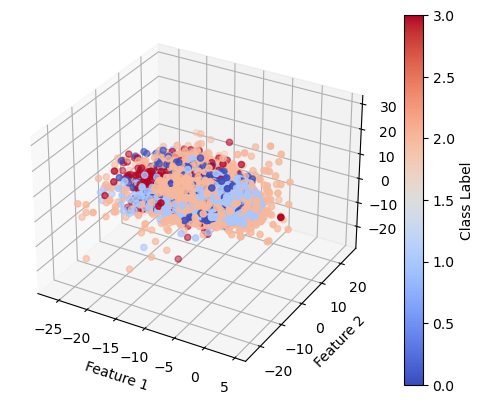

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three features (feat1, feat2, feat3) and class label (class_label)
scatter = ax.scatter(df['AccV'], df['AccML'], df['AccAP'], c=df['label'], cmap='coolwarm')

# Set labels for each axis
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Create a colorbar using the scatter plot's mappable object
cbar = plt.colorbar(scatter)
cbar.set_label('Class Label')

# Show the plot
plt.show()


In [48]:
# Assuming your large DataFrame is called "df"

# Calculate the middle index
middle_index = len(df) // 2

# Set the number of rows to display above and below the middle index
rows_to_display = 10

# Display the middle section of the DataFrame
middle_section = df.iloc[middle_index - rows_to_display:middle_index + rows_to_display]

print(middle_section)


             AccV     AccML     AccAP  label
599990  -9.135357  0.730194  4.769784      0
599991  -9.189402  0.159790  4.513099      0
599992  -9.013900 -0.315431  4.455499      0
599993  -8.924098 -0.653390  4.547447      0
599994  -9.103471 -0.812380  4.764221      0
599995  -9.185535 -0.903979  5.133776      0
599996  -9.122270 -0.995351  5.333136      0
599997  -9.016345 -0.964577  5.319964      0
599998  -8.639492 -1.012943  5.344293      0
599999  -8.419892 -1.070182  5.382472      0
600000  -9.225695  0.149824  0.548065      1
600001  -9.313448  0.078304  0.780449      1
600002  -9.540124 -0.010619  1.026785      1
600003  -9.769265 -0.031165  1.149211      1
600004  -9.985678 -0.061772  1.178558      1
600005 -10.162567 -0.098715  1.122538      1
600006 -10.220367 -0.144854  1.005179      1
600007 -10.184205 -0.168122  0.833335      1
600008 -10.133203 -0.133180  0.654642      1
600009 -10.049227 -0.136288  0.537336      1


In [49]:
# Split dataframe into features and labels
#model
features_model = df.iloc[:, :3].values
labels_model = df.iloc[:, 3:].values

In [50]:
features_model

array([[-9.66588994,  0.04254989,  0.18474362],
       [-9.67296888,  0.04921659,  0.18464446],
       [-9.67026043,  0.03361993,  0.19379039],
       ...,
       [-0.859375  ,  0.0625    , -0.3759855 ],
       [-0.86015506,  0.06171994, -0.390625  ],
       [-0.875     ,  0.046875  , -0.390625  ]])

In [51]:
labels_model

array([[3],
       [3],
       [3],
       ...,
       [2],
       [2],
       [2]])

In [52]:
device = "cuda"

In [53]:
# Split dataset into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features_model, labels_model, test_size=0.2)

# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __getitem__(self, index):
        return (torch.Tensor(self.features[index])), (torch.Tensor([self.labels[index]]))
    
    def __len__(self):
        return len(self.labels)

# Create PyTorch dataloaders for training and test sets for model1
train_dataset_model = CustomDataset(train_features, train_labels)
train_dataloader_model = DataLoader(train_dataset_model, batch_size=256, shuffle=True)

test_dataset_model = CustomDataset(test_features, test_labels)
test_dataloader_model = DataLoader(test_dataset_model, batch_size=256, shuffle=False)


In [54]:
# checking the training dataloader for model
for batch_idx, (data, target) in enumerate(train_dataloader_model):
    # Print the shape of the data and target tensors
    print(f"Batch {batch_idx+1} - Data shape: {data.shape}, Target shape: {target.shape}")
    # Print the first few rows of data and target tensors
    print(f"features: {data[:5]}\nlabels: {target[:5]}")
    # Exit the loop after the first batch
    break

Batch 1 - Data shape: torch.Size([256, 3]), Target shape: torch.Size([256, 1, 1])
features: tensor([[-9.4313e+00, -5.6497e-01,  5.8150e-01],
        [-7.7988e+00, -1.3655e+00,  4.1291e+00],
        [-8.5984e+00, -1.7571e-03,  3.7766e+00],
        [-1.0882e+00,  8.4366e-02, -3.2092e-01],
        [-1.0150e+00,  8.7705e-02, -1.1869e-01]])
labels: tensor([[[2.]],

        [[2.]],

        [[1.]],

        [[2.]],

        [[2.]]])


/tmp/ipykernel_29/1179676028.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:245.)
  return (torch.Tensor(self.features[index])), (torch.Tensor([self.labels[index]]))


In [55]:
# checking the test dataloader for model1
for batch_idx, (data, target) in enumerate(test_dataloader_model):
    # Print the shape of the data and target tensors
    print(f"Batch {batch_idx+1} - Data shape: {data.shape}, Target shape: {target.shape}")
    # Print the first few rows of data and target tensors
    print(f"features: {data[:5]}\nlabels: {target[:5]}")
    # Exit the loop after the first batch
    break

Batch 1 - Data shape: torch.Size([256, 3]), Target shape: torch.Size([256, 1, 1])
features: tensor([[ -7.3534,   0.3943,   5.7704],
        [ -9.6028,  -0.5581,   3.9063],
        [ -8.4733,   0.6973,   2.2470],
        [-10.4995,  -2.2167,   4.9427],
        [ -9.6513,  -0.0805,   0.9898]])
labels: tensor([[[3.]],

        [[0.]],

        [[3.]],

        [[1.]],

        [[3.]]])


In [56]:
# defining the neural network
# This is a pyTorch framework
# The model faetures linear as well as non linear relu layers
# There are two hidden layers
class neuralnetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(3,128)
    self.layer2 = nn.Linear(128,128)  # layers 
    self.layer3 = nn.Linear(128,128)
    self.layer4 = nn.Linear(128,128)
    self.layer5 = nn.Linear(128,128)  # layers 
    self.layer6 = nn.Linear(128,128)
    self.layer7 = nn.Linear(128,128)
    self.layer8 = nn.Linear(128,4)
    self.relu = nn.ReLU()
  def forward(self,x): # forward method
    return self.layer8(self.relu(self.layer7(self.relu(self.layer6(self.relu(self.layer5((self.relu(self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))))))))))))))

In [57]:
# each model is the instance of the neuralnetwork class
model = neuralnetwork()
# declaring the loss function and optimizer for training
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),lr=0.01) #learning rate

In [58]:
# printing the model details and parameters
print(model.state_dict)

<bound method Module.state_dict of neuralnetwork(
  (layer1): Linear(in_features=3, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=128, bias=True)
  (layer5): Linear(in_features=128, out_features=128, bias=True)
  (layer6): Linear(in_features=128, out_features=128, bias=True)
  (layer7): Linear(in_features=128, out_features=128, bias=True)
  (layer8): Linear(in_features=128, out_features=4, bias=True)
  (relu): ReLU()
)>


In [59]:
pip install tqdm #importing tqdm library to visualise the progress

Note: you may need to restart the kernel to use updated packages.


In [61]:
import tqdm

In [ ]:
num_epochs = 100
train_loss = []
test_loss = []
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # Set the initial learning rate
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,20,30,40], gamma=0.1)  # Scheduler for adjusting the learning rate
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (inputs, targets) in enumerate(train_dataloader_model):
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        targets = targets.squeeze()
        targets = targets.type(torch.long)
        loss = loss_fn(outputs, targets)
        train_loss.append(loss)
        optimizer.zero_grad()  # Zero the gradients
        loss.backward()  # Compute the gradients
        optimizer.step()  # Update the parameters
    scheduler.step()  # Update the learning rate scheduler
    print("Epoch: {}, Loss: {:.4f}, Learning Rate: {:.6f}".format(epoch, loss.item(), optimizer.param_groups[0]['lr']))


Epoch: 0, Loss: 1.0071, Learning Rate: 0.100000
Epoch: 1, Loss: 1.0033, Learning Rate: 0.100000
Epoch: 2, Loss: 1.0148, Learning Rate: 0.100000
Epoch: 3, Loss: 1.0745, Learning Rate: 0.100000
Epoch: 4, Loss: 1.0270, Learning Rate: 0.100000
Epoch: 5, Loss: 1.1059, Learning Rate: 0.100000
Epoch: 6, Loss: 0.9512, Learning Rate: 0.100000
Epoch: 7, Loss: 1.0728, Learning Rate: 0.100000
Epoch: 8, Loss: 1.0392, Learning Rate: 0.100000
Epoch: 9, Loss: 0.9385, Learning Rate: 0.010000
Epoch: 10, Loss: 0.9697, Learning Rate: 0.010000
Epoch: 11, Loss: 0.9746, Learning Rate: 0.010000
Epoch: 12, Loss: 1.0166, Learning Rate: 0.010000
Epoch: 13, Loss: 0.9601, Learning Rate: 0.010000
Epoch: 14, Loss: 1.0282, Learning Rate: 0.010000
Epoch: 15, Loss: 0.9727, Learning Rate: 0.010000
Epoch: 16, Loss: 1.0591, Learning Rate: 0.010000
Epoch: 17, Loss: 0.8956, Learning Rate: 0.010000
Epoch: 18, Loss: 1.0531, Learning Rate: 0.010000
Epoch: 19, Loss: 0.9866, Learning Rate: 0.001000
Epoch: 20, Loss: 1.0424, Learn